<a href="https://colab.research.google.com/github/jvpalhares/IA353-vonzuben/blob/main/PC1_Ativ2_LC_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook PC1_Ativ2**
## Regularized Linear Classifiers for MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** João Victor Palhares Barbosa


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11490434/11490434 [==============================] - 1s 0us/step
Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [2]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)


[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


##**A classifier with ridge regularization**


In [3]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.850 (0.003)


In [4]:
from sklearn.metrics import confusion_matrix

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
confusion_matrix(model.predict(Xt),yt)

Performance on the test data: 0.8604 



array([[ 945,    0,   18,    4,    0,   23,   18,    5,   14,   15],
       [   0, 1107,   54,   18,   22,   18,   10,   41,   46,   11],
       [   1,    2,  813,   23,    6,    3,    9,   15,   11,    2],
       [   2,    2,   25,  879,    0,   72,    0,    6,   30,   17],
       [   2,    3,   15,    5,  882,   24,   22,   26,   27,   80],
       [   7,    1,    0,   17,    5,  659,   17,    1,   39,    1],
       [  13,    5,   42,    9,   10,   24,  875,    1,   15,    1],
       [   2,    1,   22,   21,    2,   14,    0,  883,   12,   77],
       [   7,   14,   38,   22,   11,   38,    7,    0,  760,    4],
       [   1,    0,    5,   12,   44,   17,    0,   50,   20,  801]])

##**Another classifier with ridge regularization**

In [5]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 18, 2)]
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
confusion_matrix(model1.predict(Xt),yt)

Performance on the test data: 0.8617 



array([[ 944,    0,   18,    4,    0,   24,   17,    5,   14,   16],
       [   0, 1106,   55,   17,   21,   18,   10,   44,   47,   11],
       [   2,    2,  817,   20,    6,    4,   10,   15,   11,    2],
       [   2,    2,   25,  888,    0,   75,    0,    6,   31,   17],
       [   2,    3,   15,    5,  887,   24,   22,   25,   25,   79],
       [   8,    1,    0,   15,    3,  653,   18,    0,   40,    0],
       [  12,    5,   38,    9,    9,   24,  875,    1,   17,    1],
       [   2,    1,   18,   20,    1,   15,    0,  886,   12,   76],
       [   7,   15,   40,   21,    9,   39,    6,    0,  758,    4],
       [   1,    0,    6,   11,   46,   16,    0,   46,   19,  803]])

**Resposta da A:** A diferença entre a estratégia de regularização da atividade 1 e 2, é que a primeira utiliza hold-out e segunda é RidgeClassifier.

A hold-out é uma técnica comum de validação de modelo de aprendizado de máquina. É utilizada para avaliar a capacidade do modelo de generalizar a partir dos dados de treinamento para novos dados que não foram vistos durante o processo de treinamento.

A técnica de Ridge Regression adiciona um termo de penalização na função de custo que é otimizada pelo modelo. Esse termo de penalização ajuda a evitar overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. A adição desse termo de penalização permite que o modelo seja menos sensível a pequenas variações nos dados de treinamento e, portanto, mais generalizável.

**Resposta da B:** O RidgeClassifier e o RidgeClassifierCV são dois estimadores de aprendizado de máquina baseados em Ridge Regression para classificação. A principal diferença entre eles é que o RidgeClassifier é um estimador básico que não realiza uma busca pelo melhor valor de regularização, enquanto o RidgeClassifierCV é um estimador que usa a validação cruzada para encontrar o melhor valor de regularização.

O RidgeClassifier é útil quando o valor de regularização é conhecido ou pode ser estimado de antemão. Já o RidgeClassifierCV é útil quando o valor de regularização é desconhecido e precisa ser determinado a partir dos dados.

O RidgeClassifierCV ajusta automaticamente o valor de regularização com base em uma busca em uma grade de valores, usando a validação cruzada k-fold. Dessa forma, ele escolhe o valor de regularização que fornece o melhor desempenho na validação cruzada.

Em resumo, o RidgeClassifier é uma opção mais simples e direta, enquanto o RidgeClassifierCV é mais sofisticado e eficaz quando é necessário encontrar a melhor configuração de regularização a partir dos dados.


##**Visualization tools for unveiling the classification strategy**

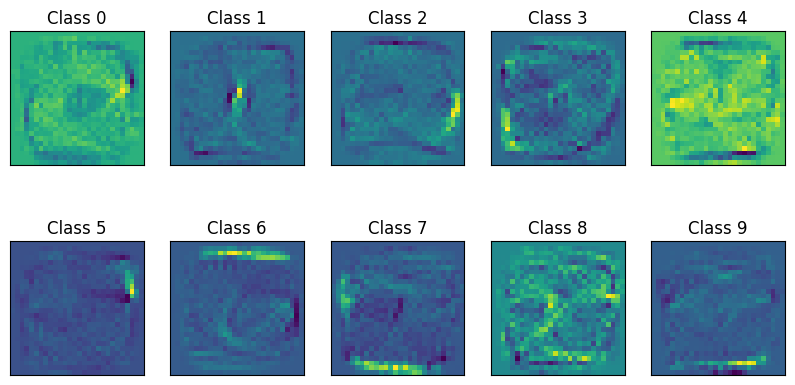

In [6]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

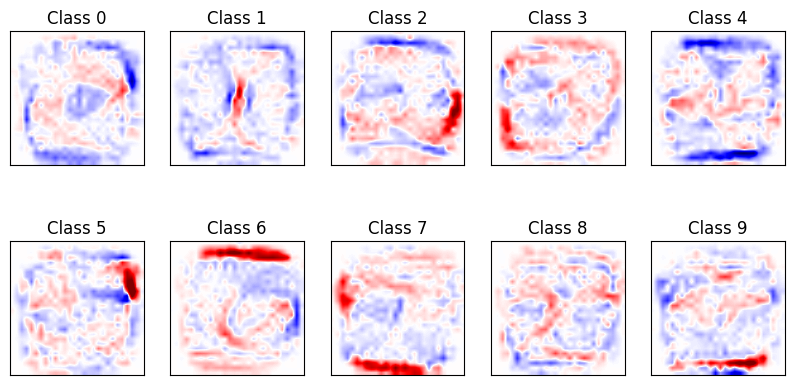

In [7]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
scale = np.abs(weights).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import cifar10

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

170498071/170498071 [==============================] - 6s 0us/step
Shape of X:  (50000, 3072)
Shape of y:  (50000, 1)
Shape of Xt:  (10000, 3072)
Shape of yt:  (10000, 1)


In [9]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)


[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


##**A classifier with ridge regularization**



In [10]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.370 (0.004)


In [11]:
from sklearn.metrics import confusion_matrix

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
confusion_matrix(model.predict(Xt),yt)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance on the test data: 0.3781 



array([[485,  64, 120,  67,  69,  51,  28,  51, 145,  61],
       [ 60, 466,  50,  77,  45,  63,  67,  69,  84, 196],
       [ 26,  20, 221,  78, 116,  87,  74,  53,  10,  17],
       [ 22,  29,  71, 175,  58, 134,  92,  44,  22,  24],
       [ 19,  27, 106,  51, 250,  60,  95,  62,   9,  18],
       [ 28,  32,  77, 187,  91, 307,  73,  92,  36,  27],
       [ 23,  49, 162, 169, 180, 106, 460,  55,  19,  50],
       [ 55,  49,  90,  64, 118,  83,  42, 426,  23,  60],
       [198,  81,  62,  52,  31,  63,  26,  54, 539,  95],
       [ 84, 183,  41,  80,  42,  46,  43,  94, 113, 452]])

**Resposta da C:** O classificador RidgeClassifierCV adota a estratégia de validação cruzada com o objetivo de encontrar o valor ótimo do hiperparâmetro alpha para a regularização Ridge. Para isso, ele divide o conjunto de treinamento em k-folds (5 folds no exemplo acima) e treina o modelo em cada combinação possível de k-1 folds, usando o fold restante para validação. Ele então calcula a média dos scores de validação para cada valor de alpha testado e escolhe o valor de alpha que resulta no score médio mais alto. Em seguida, ele refaz o treinamento com todo o conjunto de treinamento usando o valor de alpha escolhido e avalia o desempenho final no conjunto de teste.

##**Another classifier with ridge regularization**

In [12]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 18, 2)]
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
confusion_matrix(model1.predict(Xt),yt)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance on the test data: 0.4078 



array([[509,  58, 132,  64,  72,  53,  27,  65, 145,  64],
       [ 52, 522,  57,  84,  44,  75,  62,  70,  77, 207],
       [ 24,   6, 193,  67,  91,  77,  50,  43,   4,  10],
       [ 18,  23,  69, 187,  53, 112,  66,  44,  16,  14],
       [ 19,  14, 110,  38, 266,  58,  75,  63,   2,   8],
       [ 23,  25,  77, 200,  76, 337,  63,  71,  38,  21],
       [ 30,  39, 189, 162, 204, 103, 549,  43,  19,  48],
       [ 50,  53,  75,  48, 124,  71,  44, 455,  16,  47],
       [192,  87,  58,  60,  31,  74,  24,  41, 573,  94],
       [ 83, 173,  40,  90,  39,  40,  40, 105, 110, 487]])

# CIFAR-10

(10, 3072)


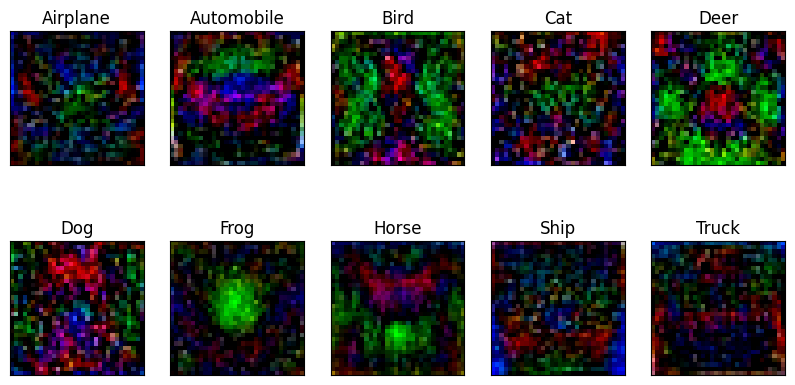

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5))
weights = model1.coef_.copy()
print(weights.shape)
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog'
, 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(10):
  plt.subplot(2, 5, i+1)
  weight1 = weights[i,:].reshape([32,32,3])
  weight1 *= 1.0/weight1.max()
  weight2 = np.clip(weight1, 0, 1)
  plt.title(classes[i])
  plt.imshow(weight2)
  frame1 = plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  frame1.axes.get_yaxis().set_visible(False)

**Resposta da D:** A perda de desempenho verificada para o caso da base CIFAR-10 pode ser sustentada por algumas razões:

I. Complexidade da tarefa: a base CIFAR-10 contém imagens coloridas de objetos em 10 categorias diferentes, enquanto a base MNIST contém apenas dígitos escritos à mão. A classificação de objetos em imagens coloridas é uma tarefa mais complexa que a classificação de dígitos escritos à mão em imagens em preto e branco.

II. Tamanho do conjunto de dados: a base CIFAR-10 contém 60.000 imagens, enquanto a base MNIST contém apenas 10.000 imagens. Um conjunto de dados maior pode tornar a tarefa de classificação mais difícil.

III. Características das imagens: as imagens da base CIFAR-10 são mais complexas e variadas do que as imagens da base MNIST. As imagens da base CIFAR-10 contêm objetos em diferentes posições e ângulos, com diferentes texturas e iluminação, o que pode dificultar a identificação das características importantes para a classificação.

IV. Necessidade de pré-processamento: a base CIFAR-10 requer mais pré-processamento do que a base MNIST. Por exemplo, as imagens da base CIFAR-10 precisam ser redimensionadas e normalizadas antes de serem utilizadas pelos classificadores, enquanto as imagens da base MNIST já vêm com tamanho e escala padronizados.